In [8]:
#https://www.kaggle.com/agalea91/mislabeled-training-images

In [1]:
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load images into dictionary where the keys
# represent patients (first label on training images)

def load_cv2_images(folder):
    imgs, masks, img_ids = {}, {}, {}
    for i in range(47):
        imgs[i+1] = []
        masks[i+1] = []
        img_ids[i+1] = []
    
    paths = glob.glob(folder+'*.tif')
    
    paths = [p for p in paths if 'mask' not in p]
    #print(paths)
    for p in paths:
        # Read in greyscale image and append to path
        #index = int(p.split('\')[3].split('_')[0])
        index = int(p.split('\\')[7].split('_')[0])
        #print(index)
        try:
            imgs[index].append(cv2.imread(p, 0))
            masks[index].append(cv2.imread(p[:-4]+'_mask.tif', 0))
            img_ids[index].append(p.split('\\')[3])
        except:
            pass
   
    for i in range(47):
        imgs[i+1] = np.array(imgs[i+1])
        masks[i+1] = np.array(masks[i+1])
    
    return imgs, masks, img_ids
col_dir = "C:\\Users\\Somesh\\JupyterPython\\NerveDectection\\input\\train\\"
imgs, masks, img_ids = load_cv2_images(col_dir)

In [3]:
imgs.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [4]:
imgs[1].shape, masks[1].shape

((120, 420, 580), (120, 420, 580))

In [5]:
# The function below will find any
# image similar to the input image

def find_pairs(compare_img, compare_mask, compare_id,
               imgs, masks, img_ids,
               compare_index, matches):

    threshold = 23000000
    for i, (img, mask, img_id) in enumerate(zip(imgs, masks, img_ids)):
        if np.abs(compare_img - img).sum() < threshold \
        and i != compare_index \
        and (compare_mask.sum() == 0) != (mask.sum() == 0):
            matches.append((compare_img, compare_mask, compare_id, img, mask, img_id))

    return matches

matches = []
for j in range(47):
    for i, (img, mask, img_id) in enumerate(zip(imgs[j+1], masks[j+1], img_ids[j+1])):
        matches = find_pairs(img, mask, img_id,
                             imgs[j+1], masks[j+1], img_ids[j+1],
                             i, matches)
len(matches)

865

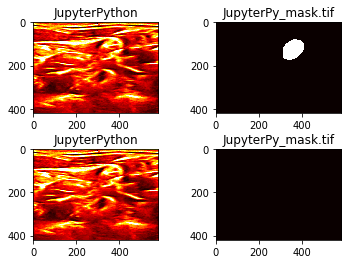

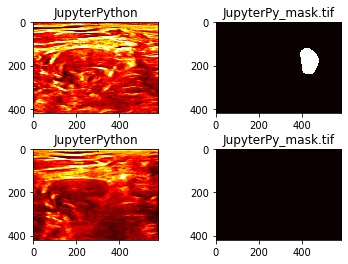

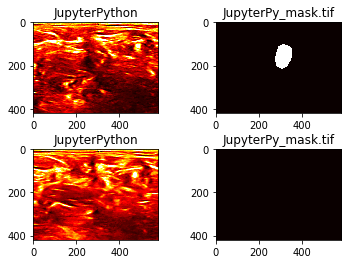

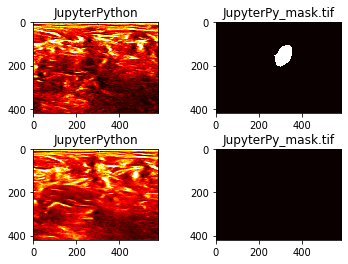

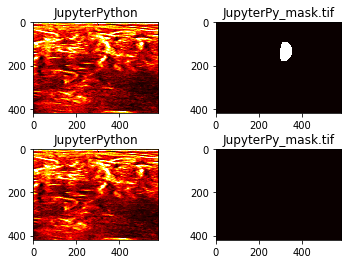

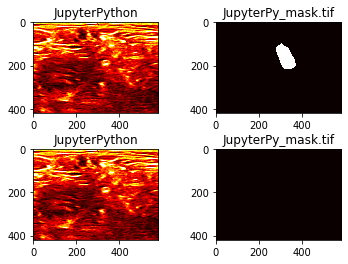

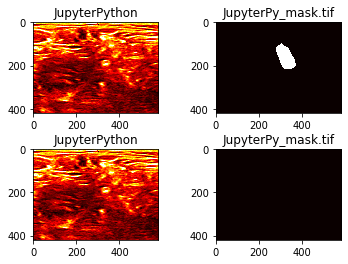

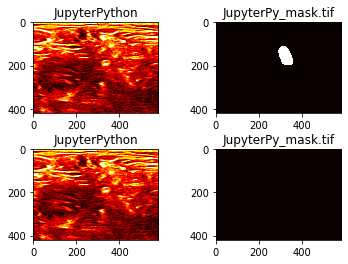

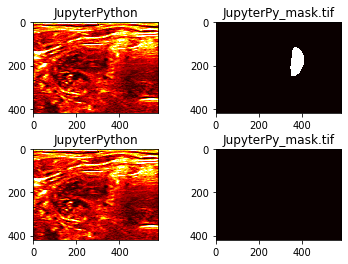

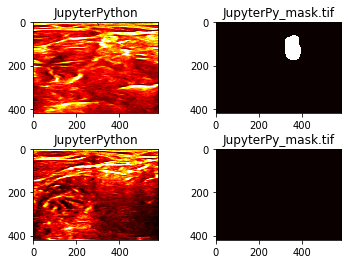

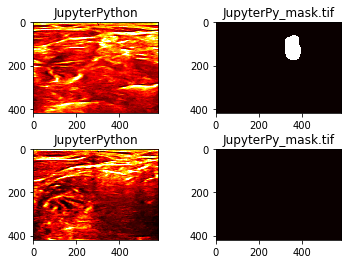

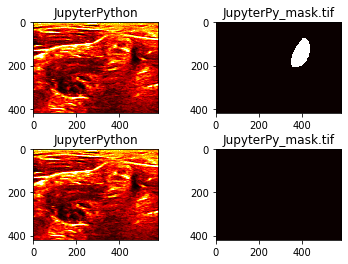

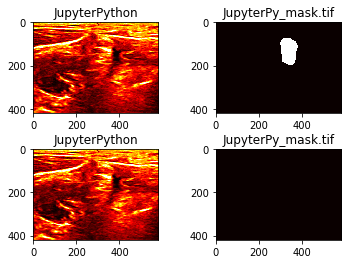

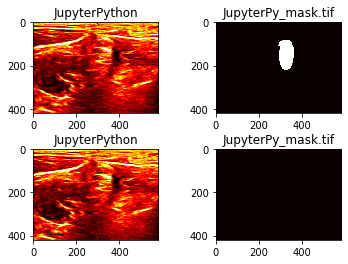

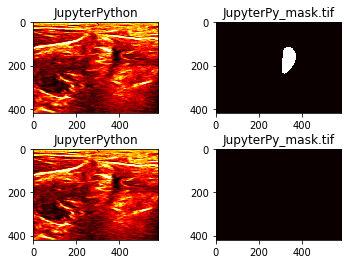

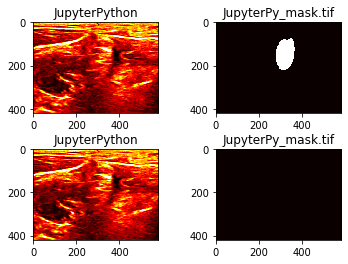

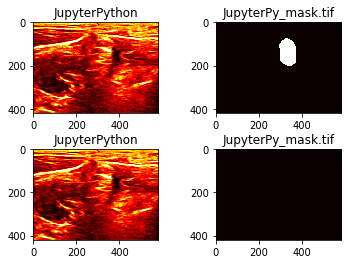

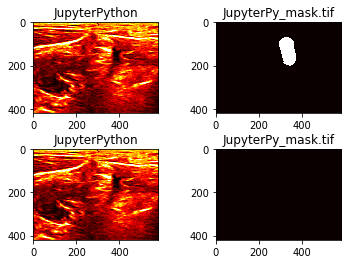

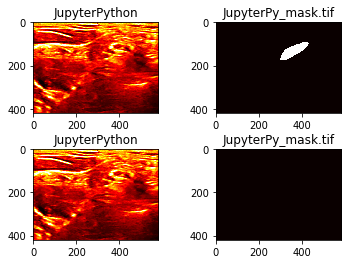

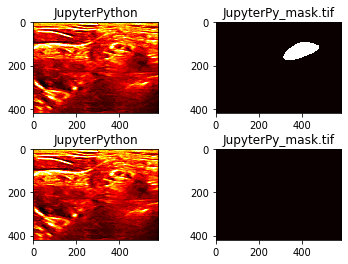

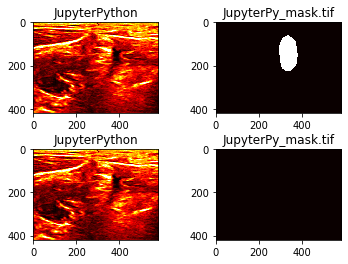

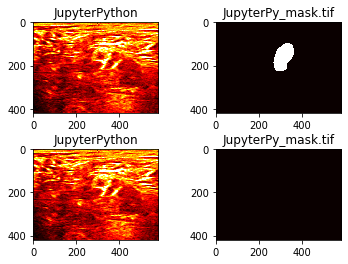

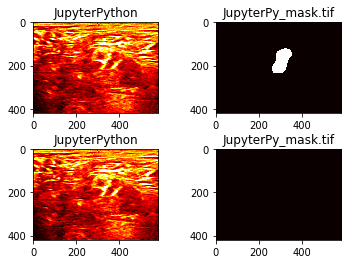

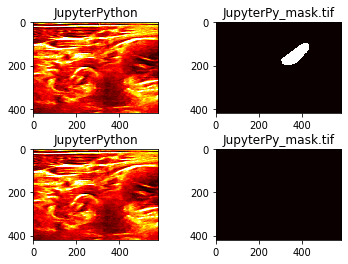

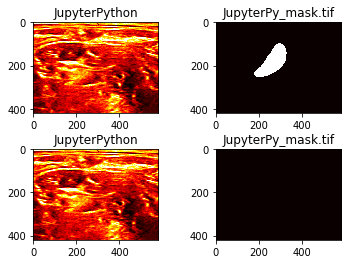

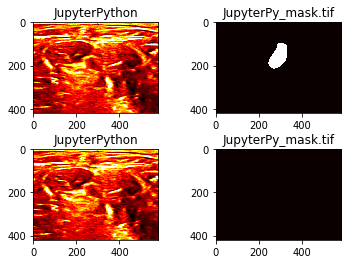

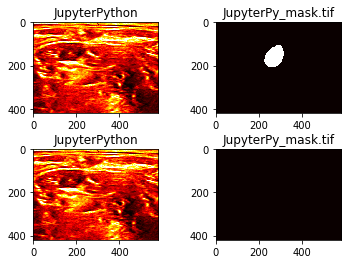

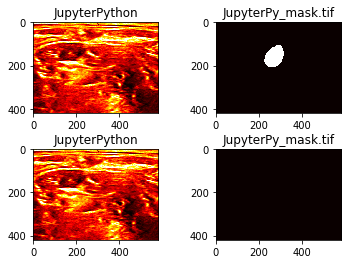

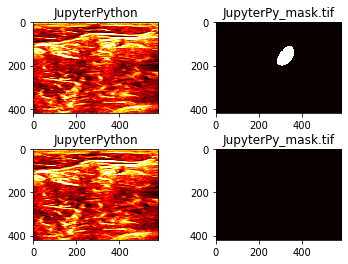

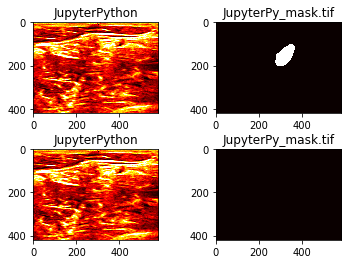

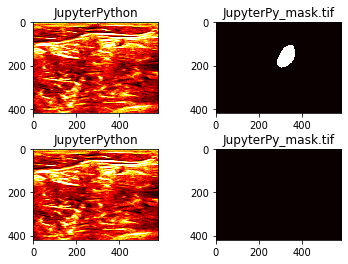

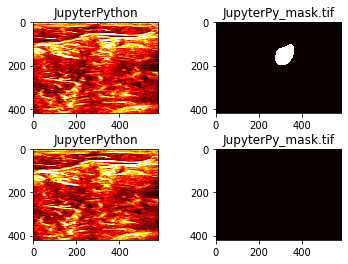

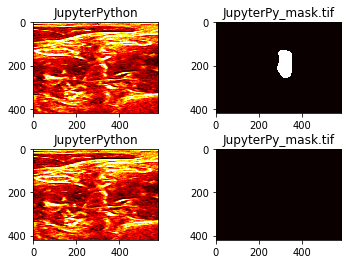

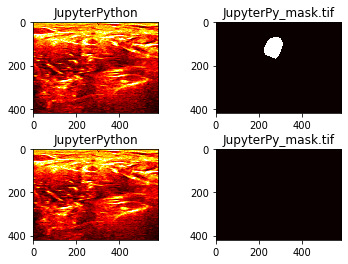

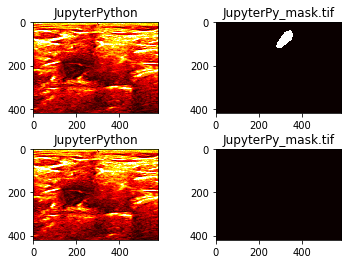

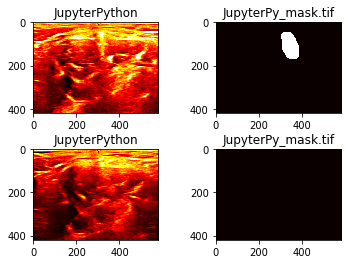

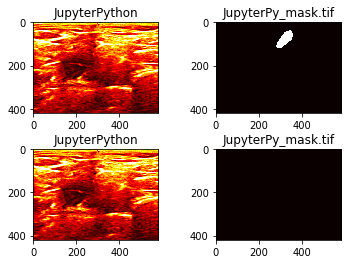

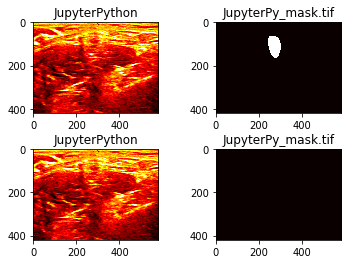

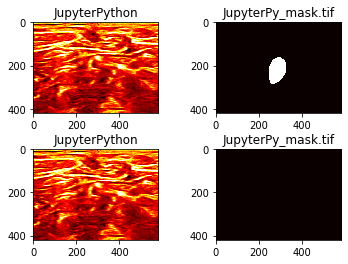

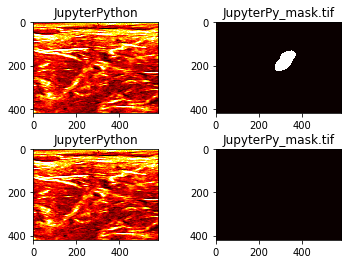

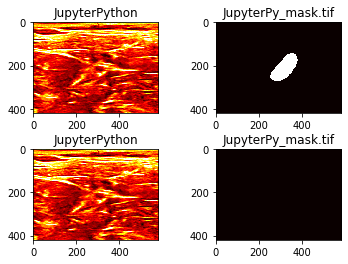

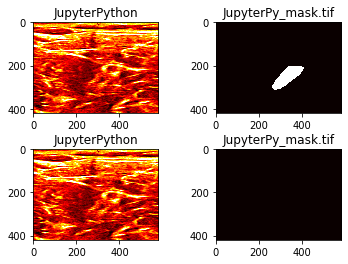

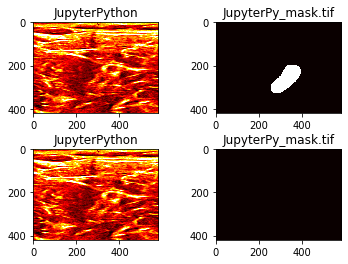

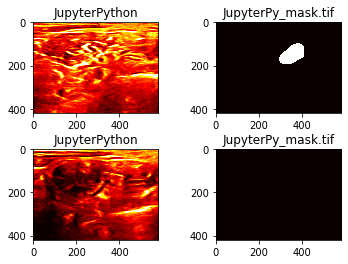

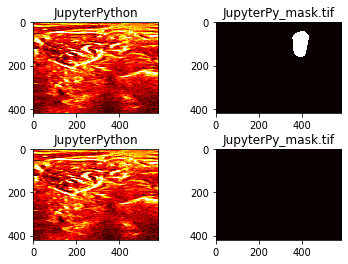

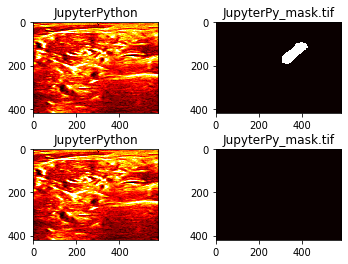

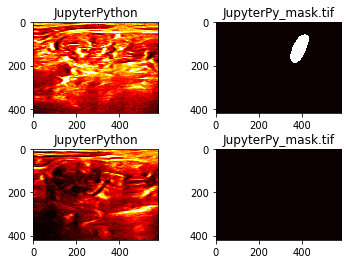

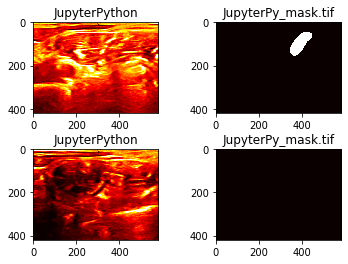

In [6]:
# Print the matches, avoiding duplicates

repeats, unique = [], []
for i, m in enumerate(matches):

    # Using pixel sums as an ID for the picture
    if m[0].sum() not in repeats\
    or m[3].sum() not in repeats:
                
        unique.append(m[0].sum())
        fig, ax = plt.subplots(2, 2)
        if m[1].sum() == 0:
            i1, i2 = 1, 0
        else:
            i1, i2 = 0, 1
            
        ax[i1][0].imshow(m[0], cmap='hot')
        ax[i1][0].set_title(m[2])
        ax[i1][1].imshow(m[1], cmap='hot')
        ax[i1][1].set_title(m[2][:-4]+'_mask.tif')
        
        ax[i2][0].imshow(m[3], cmap='hot')
        ax[i2][0].set_title(m[5])
        ax[i2][1].imshow(m[4], cmap='hot')
        ax[i2][1].set_title(m[5][:-4]+'_mask.tif')
        
        fig.subplots_adjust(hspace=0.4)
        plt.show()
        
    repeats.append(m[0].sum())
    repeats.append(m[3].sum())
    if i == 98:
        break

In [7]:
# Number of cases found
len(unique)

48